In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

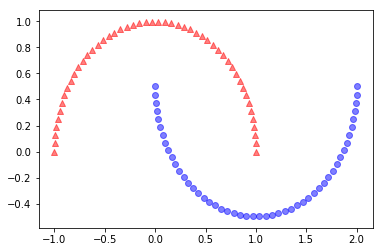

In [2]:
# Example 1 - separating half-moon shapes
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
           color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
           color='blue', marker='o', alpha=0.5)
plt.show()

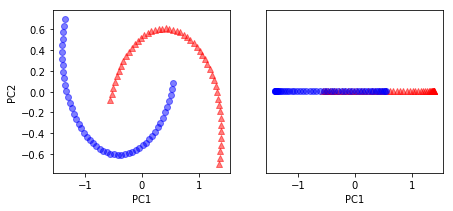

In [3]:
# These half moons (different classes) not linearly separable
# Goal is to unfold the half-moons via kernel PCA so that data can serve as suitable input for linear classifier

# Project it onto principal components via standard PCA:

from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], # principal component 1 on x-axis, 2 on y-axis
             color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
             color='blue', marker='o', alpha=0.5)
# visualize PC1 on its own, and the overlap
ax[1].scatter(X_spca[y==0, 0], np.zeros((50, 1)),
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1)),
              color = 'blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

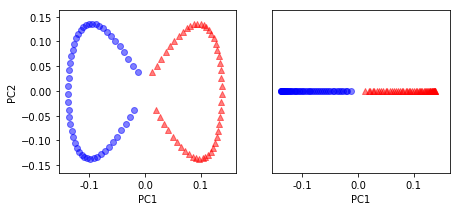

In [4]:
#using rbf_kernel_pca
from rbf_kernel_pca import rbf_kernel_pca
from matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
             color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
             color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1)),
             color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50, 1)),
             color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()
# two classes are linearly well separated so that it becomes suitable training dataset for linear classifiers
# to set gamma, have to use model evaluation and hyperparaeter tuning

In [ ]:
# Example 2 - separating concentric circles